# CH1 End of Chapter Problems

1. Take an image and apply Gaussian blur like in Figure 1.9. 

Plot the image contours for increasing values of sigma. 

What happens? Can you explain why?

In [39]:
from PIL import Image
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import display
import os
from scipy.ndimage import filters, gaussian_filter
from matplotlib.lines import Line2D
from ipywidgets import interact, fixed

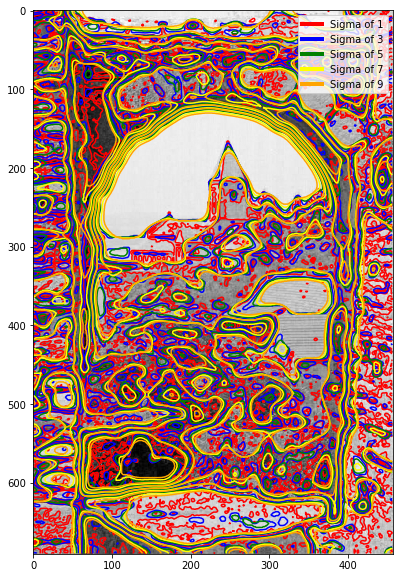

In [33]:
# Lets get an im
im = Image.open('samples/arch.jpg').convert('L')
# display(im)
# implementing gaussian smoothing on im
im_arr = np.array(im)
sigma = 3
def smooth(arr,sigma):
    return gaussian_filter(input=arr, sigma =sigma)

# Visualize for different values of sigma
plt.figure().set_size_inches(10,10)
plt.imshow(im_arr, cmap='gray')
plt.contour(smooth(im_arr, 1), colors='red')
plt.contour(smooth(im_arr, 3),  colors='blue')
plt.contour(smooth(im_arr, 5), colors='green')
plt.contour(smooth(im_arr, 7), colors='yellow')
plt.contour(smooth(im_arr, 9), colors='orange')

# Custom legend
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['Sigma of {}'.format(2*i+1) for i in range(5)])

# plt.legend()
plt.show()

Gaussian smoothing reduces the number contours which appear on the image; Like smoothing topography

2. Implement an unsharp masking operation (http://en.wikipedia.org/wiki/Unsharp_masking) by blurring an image and then subtracting the blurred version from the
original. This gives a sharpening effect to the image. Try this on both color and
grayscale images.

255
0
(691, 457, 3)


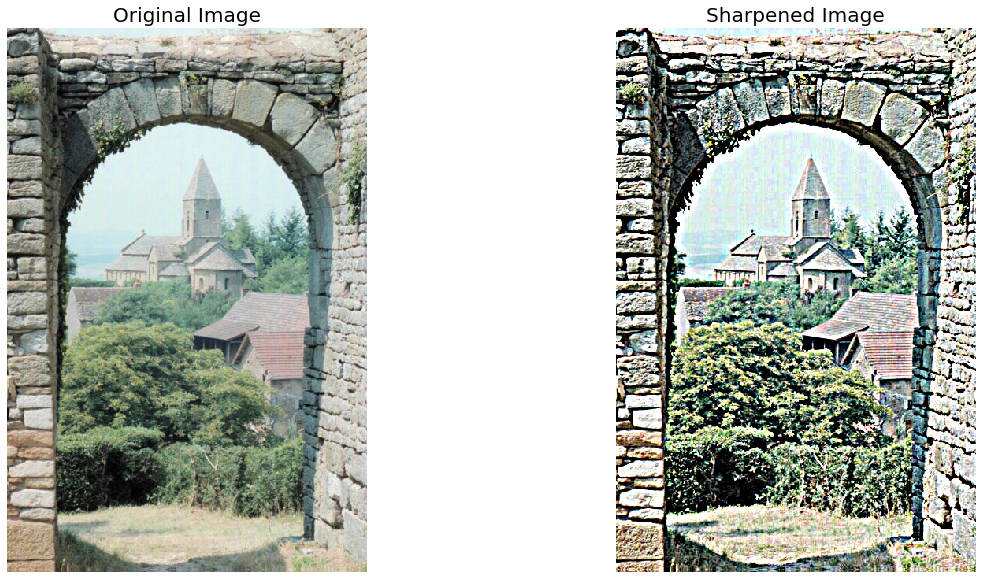

In [65]:
# Code copied from online
import cv2

# Reads as ndarray
im = cv2.imread("samples/arch.jpg")
# help(im)
# Comment the below line out to look at color images
# im = np.array(Image.fromarray(im).convert('L'))
# Implement gaussian blur
sigma = 5
im_blurred = cv2.GaussianBlur(im, (0,0), sigma)
# Add weighted ensures that we end up in the pix range allowable(0-255, e.g.)
im1 = cv2.addWeighted(im, 1.0 + 3.0, im_blurred, -3.0, 0) # im1 = im + 3.0*(im - im_blurred)
print(im1.max())
print(im1.min())
plt.figure(figsize=(20,10))
print(im1.shape)
# This is beautiful syntax, I love ;)
plt.subplot(121),plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original Image', size=20)
plt.subplot(122),plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Sharpened Image', size=20)
plt.show()

3. An alternative image normalization to histogram equalization is a quotient image. A quotient image is obtained by dividing the image with a blurred version
I/(I * $G_{\sigma}$). Implement this and try it on some sample images.

0.0 3.2758620689655173
0 255


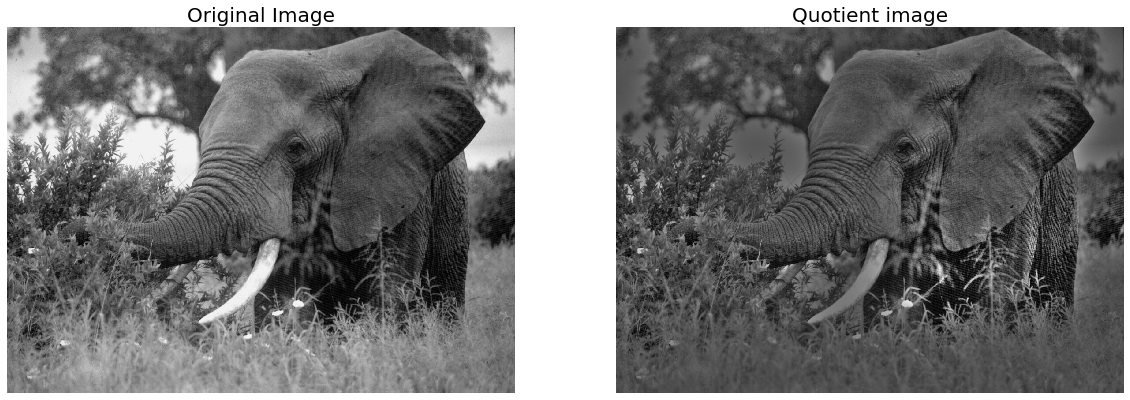

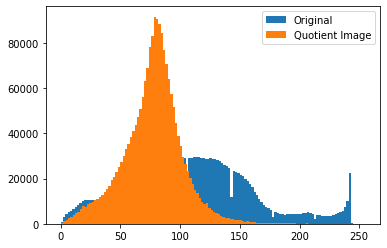

In [88]:
# Implement the gaussian smoothing
def smooth(arr,sigma):
    return gaussian_filter(input=arr, sigma =sigma)

im = np.array(Image.open('samples/elephant close.jpg').convert('L'))
g_im = smooth(im, sigma=50) # Equals 
# subtract the images
q_im = im/(g_im)
print(q_im.min(), q_im.max())
q_im = cv2.normalize(q_im, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
print(q_im.min(), q_im.max())
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original Image', size=20)
plt.subplot(122),plt.imshow(cv2.cvtColor(q_im, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Quotient image', size=20)
plt.show()

# Plot the histograms
# hist_im, cdf = histeq(im)
plt.hist(np.array(im).flatten(), 128, label='Original')
plt.hist(np.array(q_im).flatten(), 128, label='Quotient Image')
plt.legend()
plt.show()

4. Write a function that finds the outline of simple objects in images (for example a
square against white background) using image gradients.

255 0


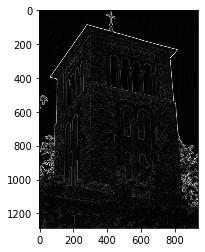

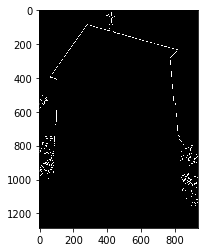

Not great but okay : )


In [131]:
# Approach: Compute the length of the directional derivative, and then threshold this value
im = np.array(Image.open('samples/Tower.jpg').convert('L'))
# Compute sobel derivatives
sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=5)
sobel_combined = (sobelx**2+sobely**2)**0.5
sobel_combined = cv2.normalize(sobel_combined, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
print(sobel_combined.max(), sobel_combined.min())
deriv_binary = sobel_combined>128
plt.imshow(sobel_combined, cmap = 'gray')
plt.show()
plt.imshow(deriv_binary, cmap = 'gray')
plt.show()
print('Not great but okay : )')


5. Use gradient direction and magnitude to detect lines in an image. Estimate the
extent of the lines and their parameters. Plot the lines overlaid on the image.

I don't think I know how to approach this one. Specifically the " Estimate the extent of the lines and their parameters". Other than tracing each point to find its termination, idk how to approach that.

6. Apply the label() function to a thresholded image of your choice. Use histograms
and the resulting label image to plot the distribution of object sizes in the image.

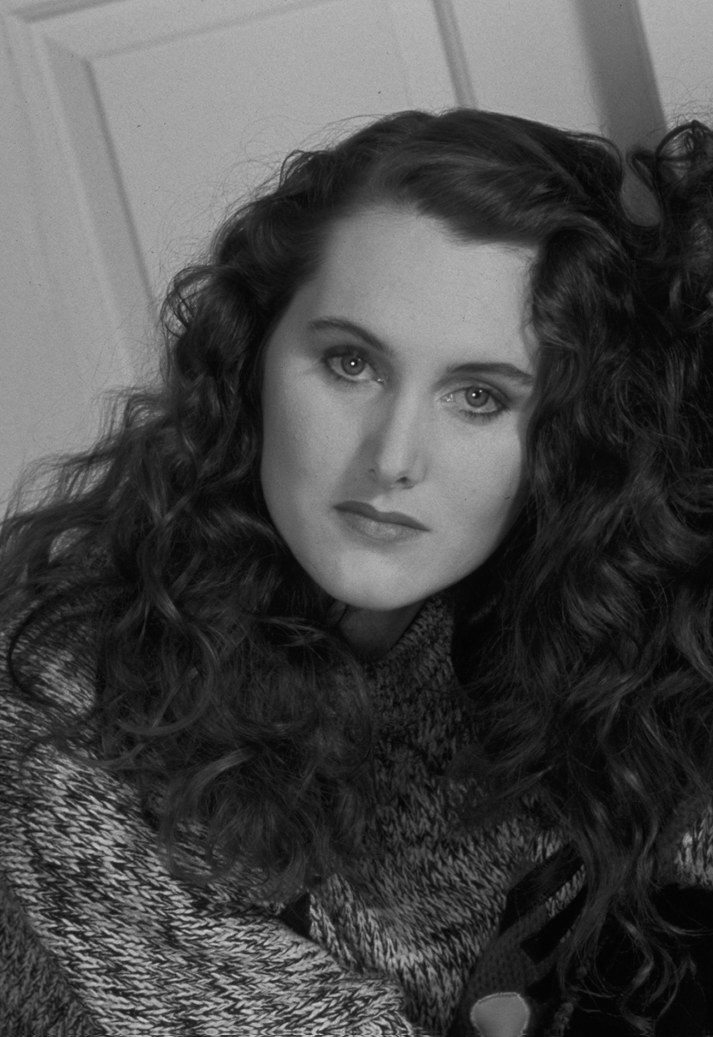

interactive(children=(IntSlider(value=150, description='threshhold', max=450, min=-150), Output()), _dom_class…

In [51]:
from scipy.ndimage import measurements,morphology
from matplotlib import colors

im = Image.open('samples/onetoone.jpg').convert('L')
display(im)
im = gaussian_filter(im, 6)
@interact
def godoit(threshhold = 150):
    im_thresh = np.array(im)>threshhold
    plt.figure(figsize=(10,10))
    plt.imshow(im_thresh, cmap='gray')
    plt.show()

    labels, n_obj = measurements.label(im_thresh)
    print("Number of objects:{}".format(n_obj))
    # Define our colormap labels
    # make a color map of fixed colors
    cols = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'brown', 'yellow']
    cmap = colors.ListedColormap(cols)
    bounds=list(range(len(cols)))
    bounds.append(1000)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    for i in range(n_obj):
        plt.hist(labels[labels == i], color=cols[i],label='Object {}'.format(i+1))
    plt.legend
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(labels, cmap=cmap)
    print(labels.max())
    plt.show()
    return im_thresh, labels

The above sort of works, but its not a great example image to use for segmenting regions out.

7. Experiment with successive morphological operations on a thresholded image of
your choice. When you have found some settings that produce good results, try
the function center_of_mass in morphology to find the center coordinates of each
object and plot them in the image.

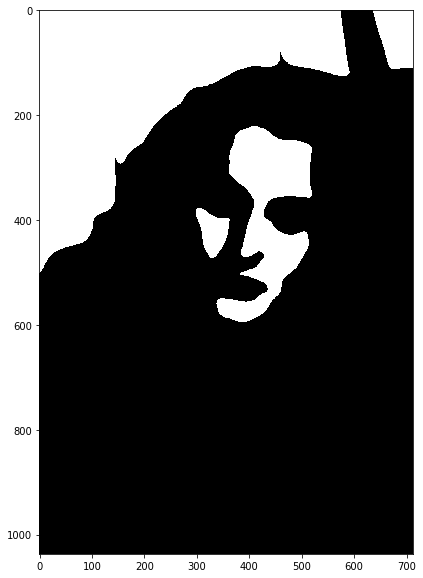

Number of objects:4


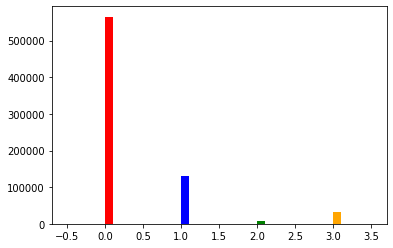

4


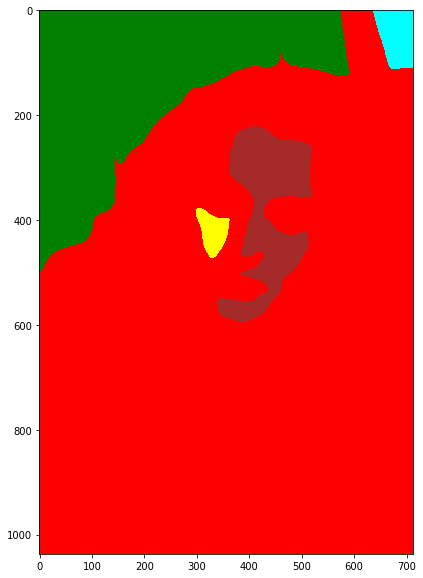

In [56]:
from scipy.ndimage import label
# Ill just continue with the last problem for this one, since its pretty similar. Building off of labels
thresh, labels = godoit(139)

[(616.8637107431146, 383.6383245206383), (151.04466985645934, 199.93113875598087), (50.22501469723692, 681.1909171075838), (384.10662177328845, 436.2100282100282), (421.9354403025392, 330.6453268503512)]


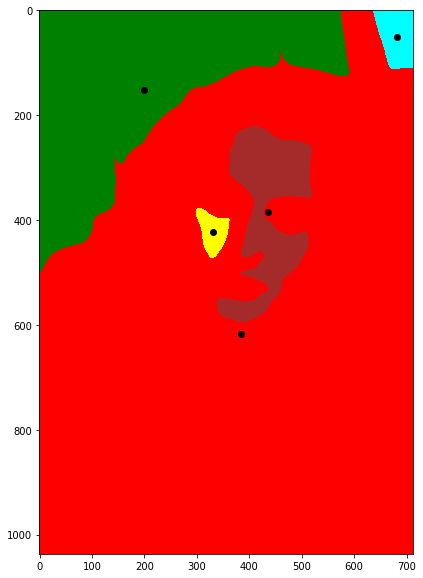

In [83]:
mylab = label(thresh) # Labels the thresholded image (The prior example should have worked, idk why it didnt)
coords = measurements.center_of_mass(thresh+1, labels=mylab[0]+1, index=[1+i for i in np.unique(mylab[0])])
print(coords)
plt.figure(figsize=(10,10))
plt.imshow(labels, cmap=cmap)
exes, whys = [],[]
for el in coords:
    exes.append(el[0])
    whys.append(el[1])
plt.scatter(whys,exes,  c='k')
plt.show()


That worked pretty well, sweet